In [11]:
import imageio 
from matplotlib import pyplot as plt
from skimage import data, io
import ipywidgets as widgets
from ipywidgets import Button, Layout
#from SimpleCV import Image
import cv2
from skimage import data, io, filters, exposure
import skimage.morphology as mp
import numpy as np
from skimage.filters import roberts, sobel, scharr, prewitt, frangi, try_all_threshold, threshold_otsu, threshold_local
from skimage import img_as_float
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
import cv2
import numpy as np

In [201]:
style = {'description_width': '40%'}

selector = widgets.Dropdown(
    options=[('Healthy eye 1', ['photos/Image_01L.jpg','photos/Image_01L_1stHO.png']), ('Healthy eye 2', ['photos/Image_02L.jpg','photos/Image_02L_1stHO.png']), 
             ('Healthy eye 3', 'photos/03_h.jpg'), ('Healthy eye 4', 'photos/04_h.jpg'),
            ('Healthy eye 5', 'photos/05_h.jpg'), ('Healthy eye 6', 'photos/06_h.jpg'),
            ('Healthy eye 7', 'photos/07_h.jpg'), ('Healthy eye 8', 'photos/08_h.jpg'), 
            ('Healthy eye 9', 'photos/09_h.jpg'), ('Healthy eye 10', 'photos/010_h.jpg'),
            ('Healthy eye 11', 'photos/011_h.jpg'), ('Healthy eye 12', 'photos/012_h.jpg'), 
            ('Healthy eye 13', 'photos/013_h.jpg'), ('Healthy eye 14', 'photos/014_h.jpg'), 
            ('Healthy eye 15', 'photos/015_h.jpg')],
    value=['photos/Image_01L.jpg','photos/Image_01L_1stHO.png'],
    description='Image:',
    layout=Layout(width='50%', height='30px'),
    style=style
)

display(selector)

Dropdown(description='Image:', layout=Layout(height='30px', width='50%'), options=(('Healthy eye 1', ['photos/…

In [206]:
img = cv2.imread(selector.value[0],0)
equ = cv2.equalizeHist(img)
# create a CLAHE object (Arguments are optional)
#CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
#Zsres2 = np.hstack((img,cl1))
#cv2.imwrite('hist_clahe1.jpg',cl1)


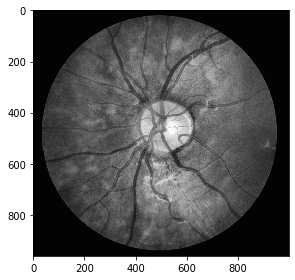

In [208]:
io.imshow(cl1)

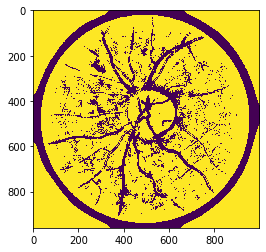

In [210]:
normalizedImg = np.zeros((800, 800))
normalizedImg = cv2.normalize(sobely,  normalizedImg, 0, 255, cv2.NORM_MINMAX)
frangi_fajen = frangi(normalizedImg)
matrixp = []
for row in frangi_fajen:
    rowp = []
    for elem in row:
        if elem > 0.06:
            elem = 1
        else:
            elem = 0.0
        rowp.append(elem)
    matrixp.append(rowp)

    
block_size = 213
#adaptive_thresh = threshold_local(img, block_size, offset=10)
#binary_adaptive = img > adaptive_thresh
adaptive_thresh = threshold_local(cl1, block_size, offset=10)
binary_adaptive = cl1 > adaptive_thresh

#new =  try_all_threshold(matrixp)
#fig, ax = try_all_threshold(normalizedImg, figsize=(10, 8), verbose=False)
#plt.show()
plt.imshow(binary_adaptive)
#print(frangi_fajen.max())
#print(frangi_fajen.min())
#print(frangi_fajen.mean())

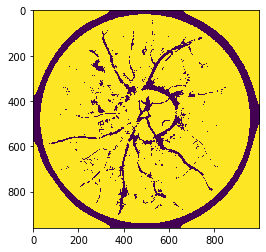

In [219]:

block_size = 213
adaptive_thresh = threshold_local(cl1, block_size, offset=10)
binary_adaptive = cl1 > adaptive_thresh
binary_adaptive3 = mp.dilation(mp.dilation(mp.dilation(mp.erosion(binary_adaptive))))
plt.imshow(binary_adaptive3)

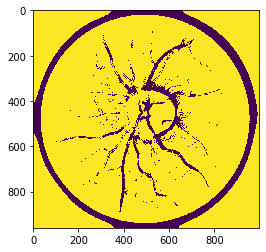

In [212]:
adaptive_thresh = threshold_local(img, block_size, offset=10)
binary_adaptive2 = img > adaptive_thresh
plt.imshow(binary_adaptive2)

In [217]:
for i in range(len(binary_adaptive)):
    for j in range(len(binary_adaptive[0])):
        if(mask[i][j] == 0):
            binary_adaptive[i][j] = 1

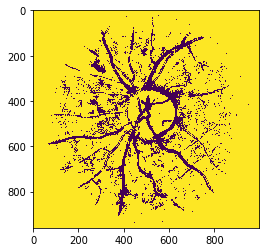

In [218]:
plt.imshow(binary_adaptive)

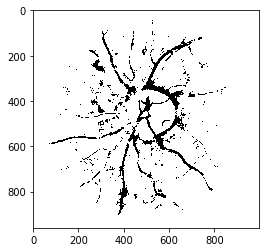

In [237]:
image =cv2.imread(selector.value[0])
def create_mask(image):
    img = rgb2gray(image)
    img[img[:, :] > 0.05] = 1
    img[img[:, :] <= 0.05] = 0
    img = mp.dilation(img)
    return img

def image(img, mask):
    mask = create_mask(mask)
    #img = cv2.imread(selector.value[0],0)
    equ = cv2.equalizeHist(img)
    # create a CLAHE object (Arguments are optional)
    #CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1 = clahe.apply(img)
    block_size = 213
    adaptive_thresh = threshold_local(cl1, block_size, offset=10)
    binary_adaptive = cl1 > adaptive_thresh
    binary_adaptive = mp.dilation(mp.dilation(mp.dilation(mp.erosion(binary_adaptive))))
    for i in range(len(binary_adaptive)):
        for j in range(len(binary_adaptive[0])):
            if(mask[i][j] == 0):
                binary_adaptive[i][j] = 1
    return binary_adaptive

plt.imshow(image(cv2.imread(selector.value[0],0),cv2.imread(selector.value[0])), cmap = plt.cm.gray)


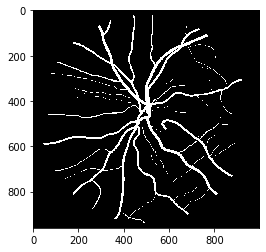

In [224]:
plt.imshow(cv2.imread(selector.value[1]))